# **Problem Statement:**
**Deploy the CART algorithm on the Irish dataset to accurately classify flower specimens into their respective families based on distinct features**

# **Description of Data set:**
As a Dataset we will use the Iris Dataset. The Iris flower dataset consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor)

This Dataset contains data about different plants, specifically it contains:

Sepal length in cm

Sepal width in cm

Petal length in cm

Petal width in cm

#**Procedure:**

1. Select Root node(S) based on low Entropy and Highest Information Gain

2. On each iteration of an algorithms it calculate the Entropy and Information gain, considering that every node is unused

3. Select node base on Lowest Entropy or Highest I.G

4. then Splits set S to produce the subsets of data

5. An algorithms continuous to recur on each subset and make sure that attributes are fresh and Creates the decision Tree

**Import library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the Iris dataset to a variable
iris = datasets.load_iris()


df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [8]:
# Let's explore our features.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


We can now explore our target data y to see to what family this plant belongs.

In [11]:
# print(y)
df.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
5.8                2.7               5.1                1.9               2.0       2
6.2                2.2               4.5                1.5               1.0       1
                   2.9               4.3                1.3               1.0       1
                   3.4               5.4                2.3               2.0       1
6.3                2.3               4.4                1.3               1.0       1
                                                                                   ..
5.4                3.9               1.3                0.4               0.0       1
                                     1.7                0.4               0.0       1
5.5                2.3               4.0                1.3               1.0       1
                   2.4               3.7                1.0               1.0       1
7.9                3.8               6.4                2.0

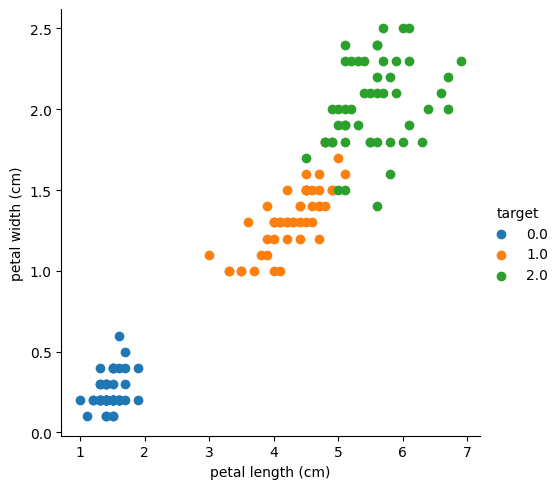

In [13]:
sns.FacetGrid(df, hue="target",height=5).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

# **Creating and Training our model**
Now that we got our data prepared and rid of that `Categorical` column we can proceed to create our model.

We usually split our data into 2 sets: `Training Data` and `Testing Data`. Around 75% training - 25% testing is reasonable.

In [15]:
from sklearn.model_selection import train_test_split
#Splitting the data into training and testing sets
X=df.drop('target',axis = 1)
Y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

#defining(training) the decision tree
#model = DecisionTreeClassifier(criterion="entropy",max_depth=5)  # for ID3
model=DecisionTreeClassifier()  # CART
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
model.score(iris.data, iris.target)

0.9733333333333334

In [17]:
#Make predictions

expected = iris.target
predicted = model.predict(iris.data)

In [18]:
#Summarize the fit of the model

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


**Visualization**

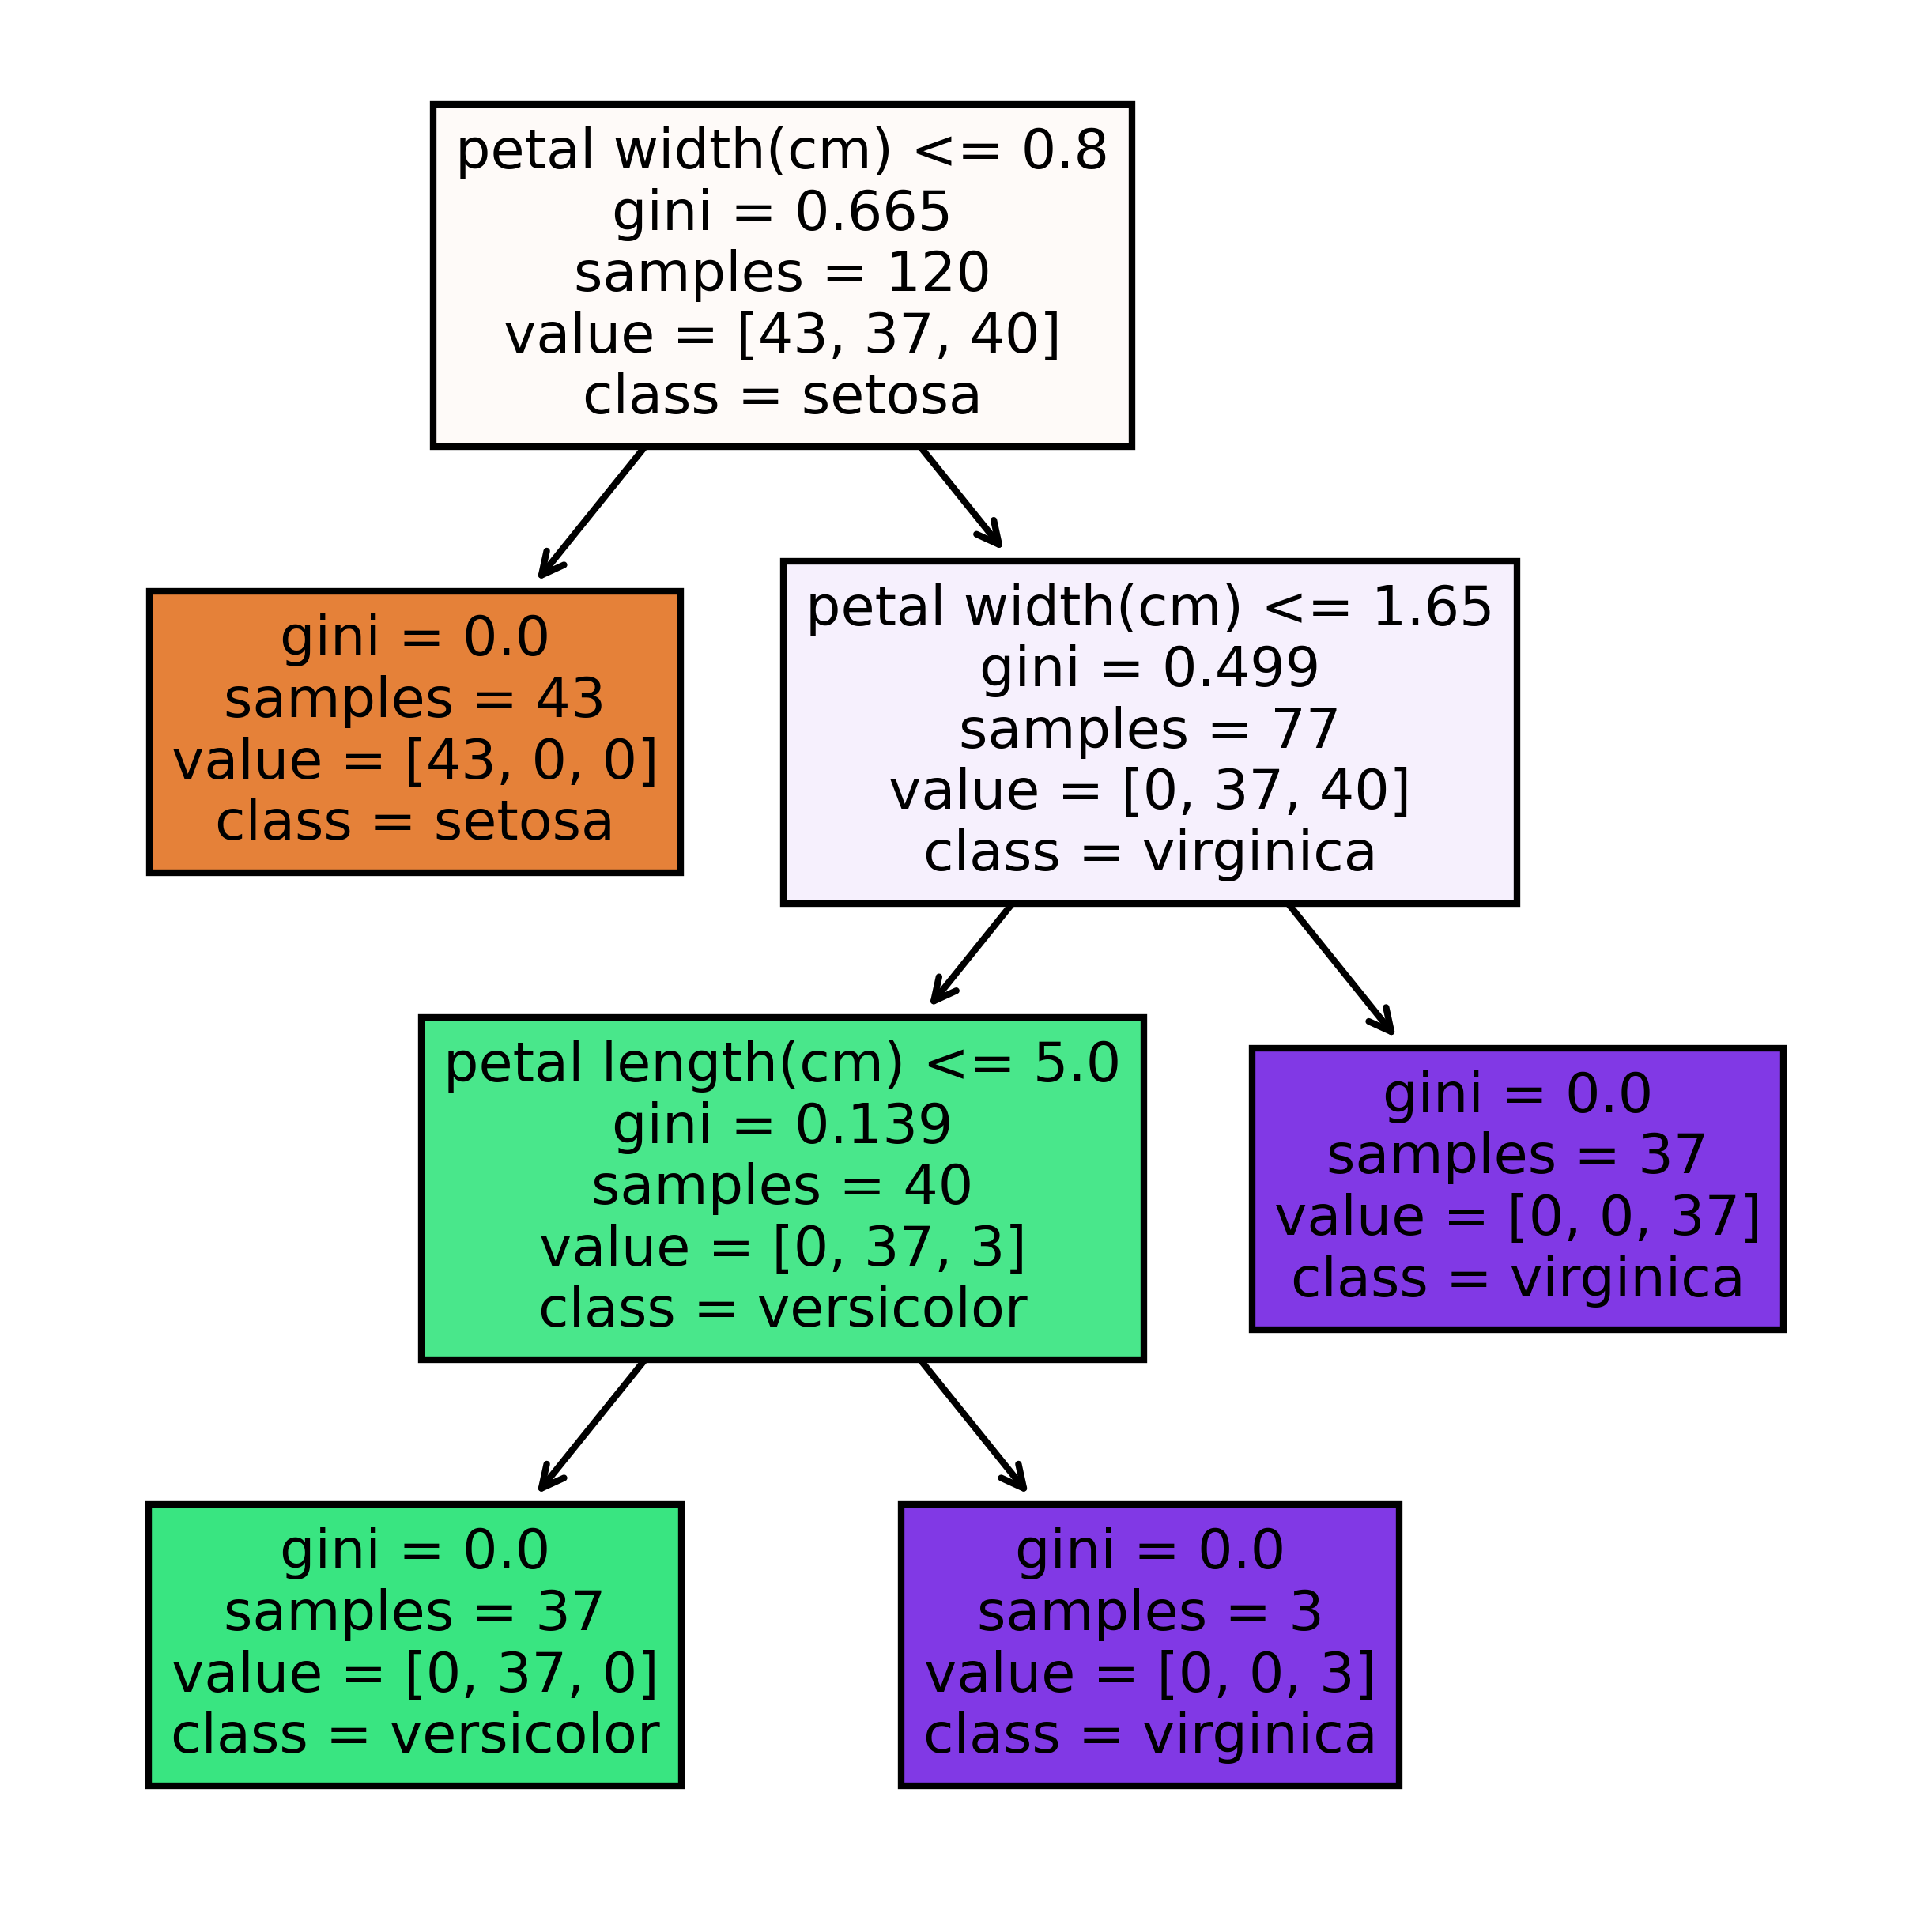

In [19]:
from sklearn import tree
names=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
classes=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=600)
tree.plot_tree(model,feature_names=names,class_names=classes,filled=True);

**Predicting Species for a set of values**

In [20]:
X_new = [[0.3,3.7,3.3,1.2]]
# change the values and check the species

In [21]:
species = model.predict(X_new)
# "setosa": 0, "versicolor": 1, "virginica": 2
if species==0:
    print ("=> setosa")
elif species==1:
    print("=> versicolor")
else:
    print("=> virginica")

=> versicolor


# **REMARKS:**
**The CART Decision Tree algorithm applied to the Iris dataset exhibits a commendable ability to discern and classify the diverse floral species based on distinctive features. Leveraging information gain to select optimal attributes, the algorithm constructs an interpretable tree structure, providing insights into the decision-making process. Its performance on the Iris dataset highlights its efficacy in capturing intricate patterns, making it a valuable tool for botanical classification tasks.**